In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [19]:
data = pd.read_csv('survey.csv')
xs = data['age'].to_numpy()
ys = data['recognized_it'].to_numpy()
x_sort = np.argsort(xs)
age = xs[x_sort]
recognize = ys[x_sort]

In [20]:
def log_likelihood(beta, xs, ys):
    beta_0 = beta[0]
    beta_1 = beta[1]
    epsilon = 1e-16
    l_list = [ys[i]*np.log(p(xs[i], beta_0, beta_1)/(1-p(xs[i], beta_0, beta_1)+epsilon)) 
              + np.log(1-p(xs[i], beta_0, beta_1)+epsilon) for i in range(len(xs))]
    ll = np.sum(np.array(l_list), axis = -1)
    return -ll # return log likelihood

In [21]:
def p(x, beta0, beta1): 
    return 1/(1+np.exp(-(beta0+beta1*x)))

In [47]:
def Covariance(hess_inv, resVariance):
    return hess_inv * resVariance

def error(hess_inv, resVariance):
    covariance = Covariance(hess_inv, resVariance)
    return np.sqrt( np.diag( covariance ))

pstart = [1,42]
beta = np.array([-1,1])

In [48]:
result = optimize.minimize(lambda beta, age, recognize: log_likelihood(beta, age, recognize),beta,args=(age, recognize))
hess_inv = result.hess_inv # inverse of hessian matrix
var = result.fun/(len(recognize)-len(pstart))
dFit = error(hess_inv,var)
print('Optimal parameters and error:\n\tp: ' , result.x, '\n\tdp: ', dFit)
print('Covariance matrix of optimal parameters:\n\tC: ' , Covariance( hess_inv,  var))

Optimal parameters and error:
	p:  [-5.62023318  0.10956342] 
	dp:  [0.07135651 0.00426131]
Covariance matrix of optimal parameters:
	C:  [[ 5.09175175e-03 -1.17826017e-04]
 [-1.17826017e-04  1.81587401e-05]]


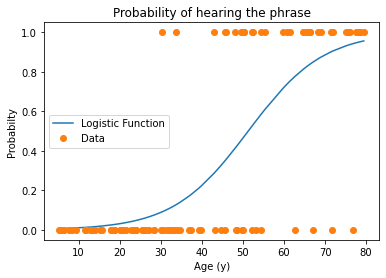

In [49]:
plt.plot(age, p(age, result.x[0], result.x[1]), label='Logistic Function')
plt.plot(age, recognize, 'o', label='Data')
plt.title('Probability of hearing the phrase')
plt.xlabel('Age (y)')
plt.ylabel('Probabilty')
plt.legend()
plt.savefig('ps7_2.png')